## `Medical Cost Personal Datasets`

![](https://res.cloudinary.com/dvmdv4ttu/image/upload/c_scale,w_950/f_auto/v1/img/opt_Health-Insurance-Tech-Trends.jpeg)

`
"Empowering healthcare cost analysis through meticulous data-driven exploration and predictive modeling, unveiling insights for impactful financial projections in medical care."`

In [1]:
!pip install sklearn_features

## `Main Liberaries`

In [123]:
# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")
import joblib


# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# algorithms
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb

# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import mean_squared_error

## `The Data`

In [3]:
# read the Data
file_path = "/kaggle/input/insurance/insurance.csv"

# Read the csv file if is founded

if os.path.exists(file_path):
    
    df = pd.read_csv(file_path)
    print(df.head())
    
else:
    print("The File does not exist.")

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# show the head of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## `Content`
## Columns

`age`: age of primary beneficiary

`sex`: insurance contractor gender, female, male

`bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

`children`: Number of children covered by health insurance / Number of dependents

`smoker`: Smoking

`region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

`charges`: Individual medical costs billed by health insurance

In [5]:
# some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# some describtions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## `Exploratory Data Analysis (EDA)`

<Axes: >

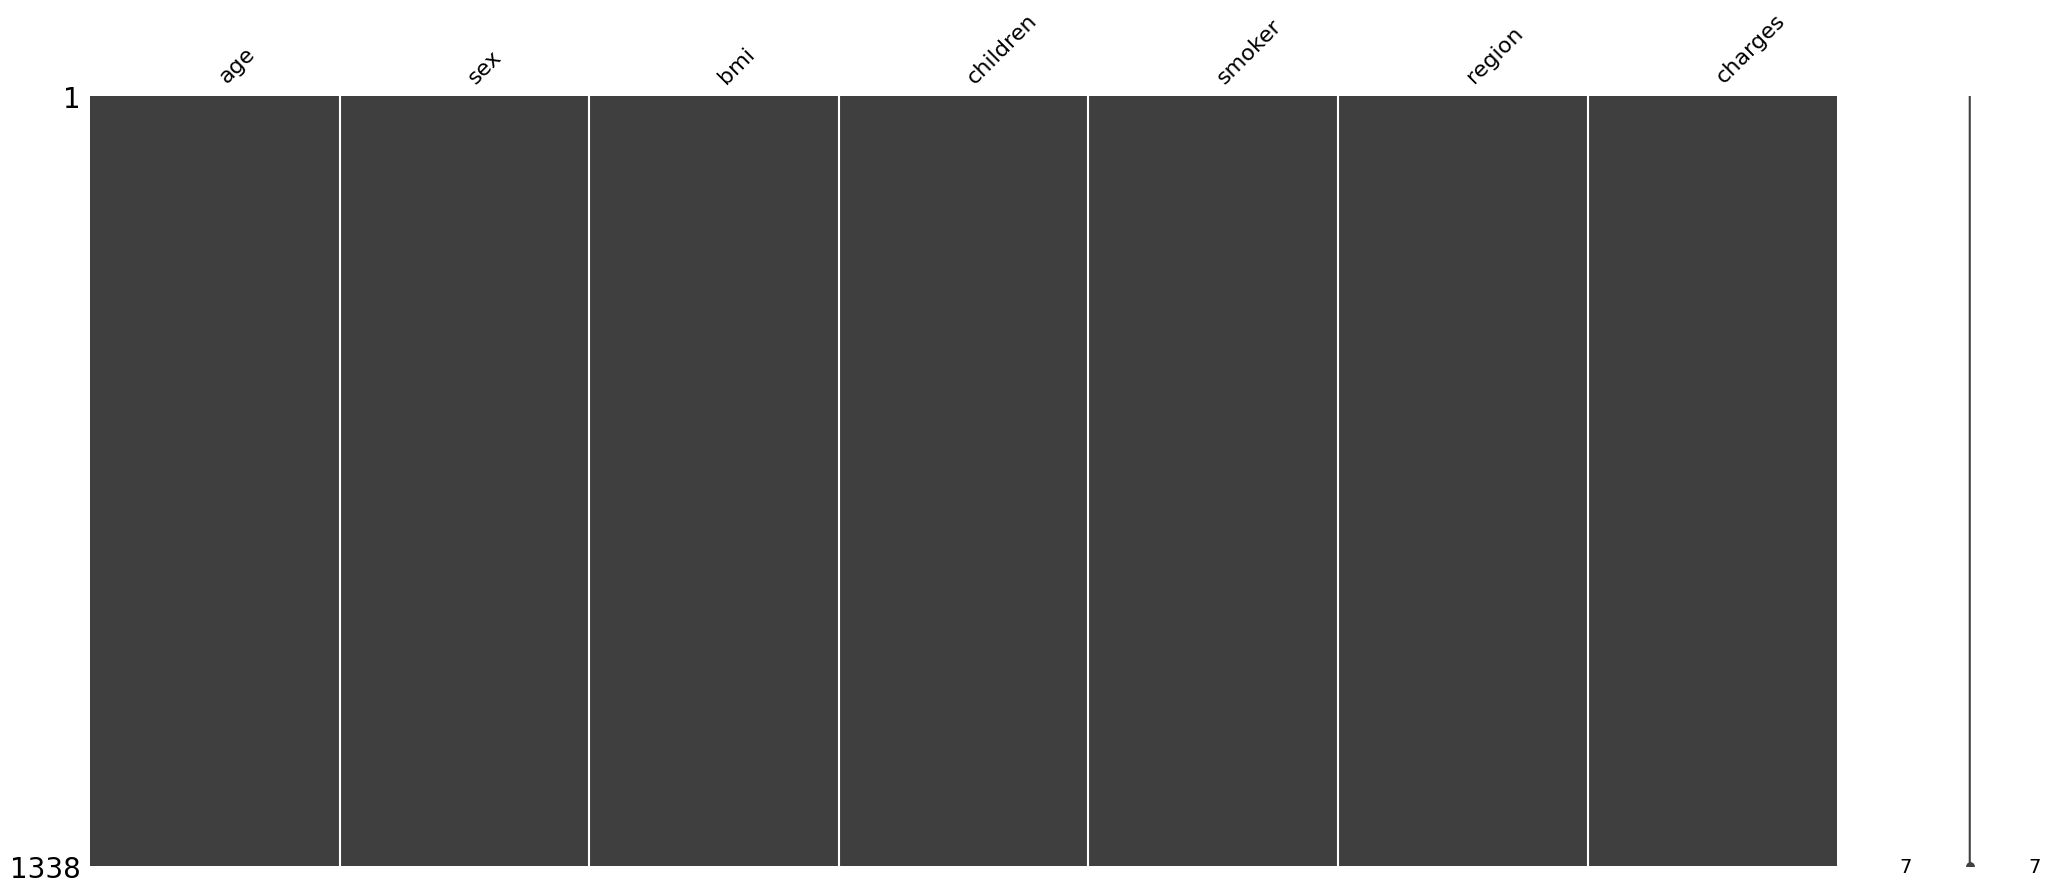

In [7]:
# check the nulls using missingno
msn.matrix(df)

<Axes: >

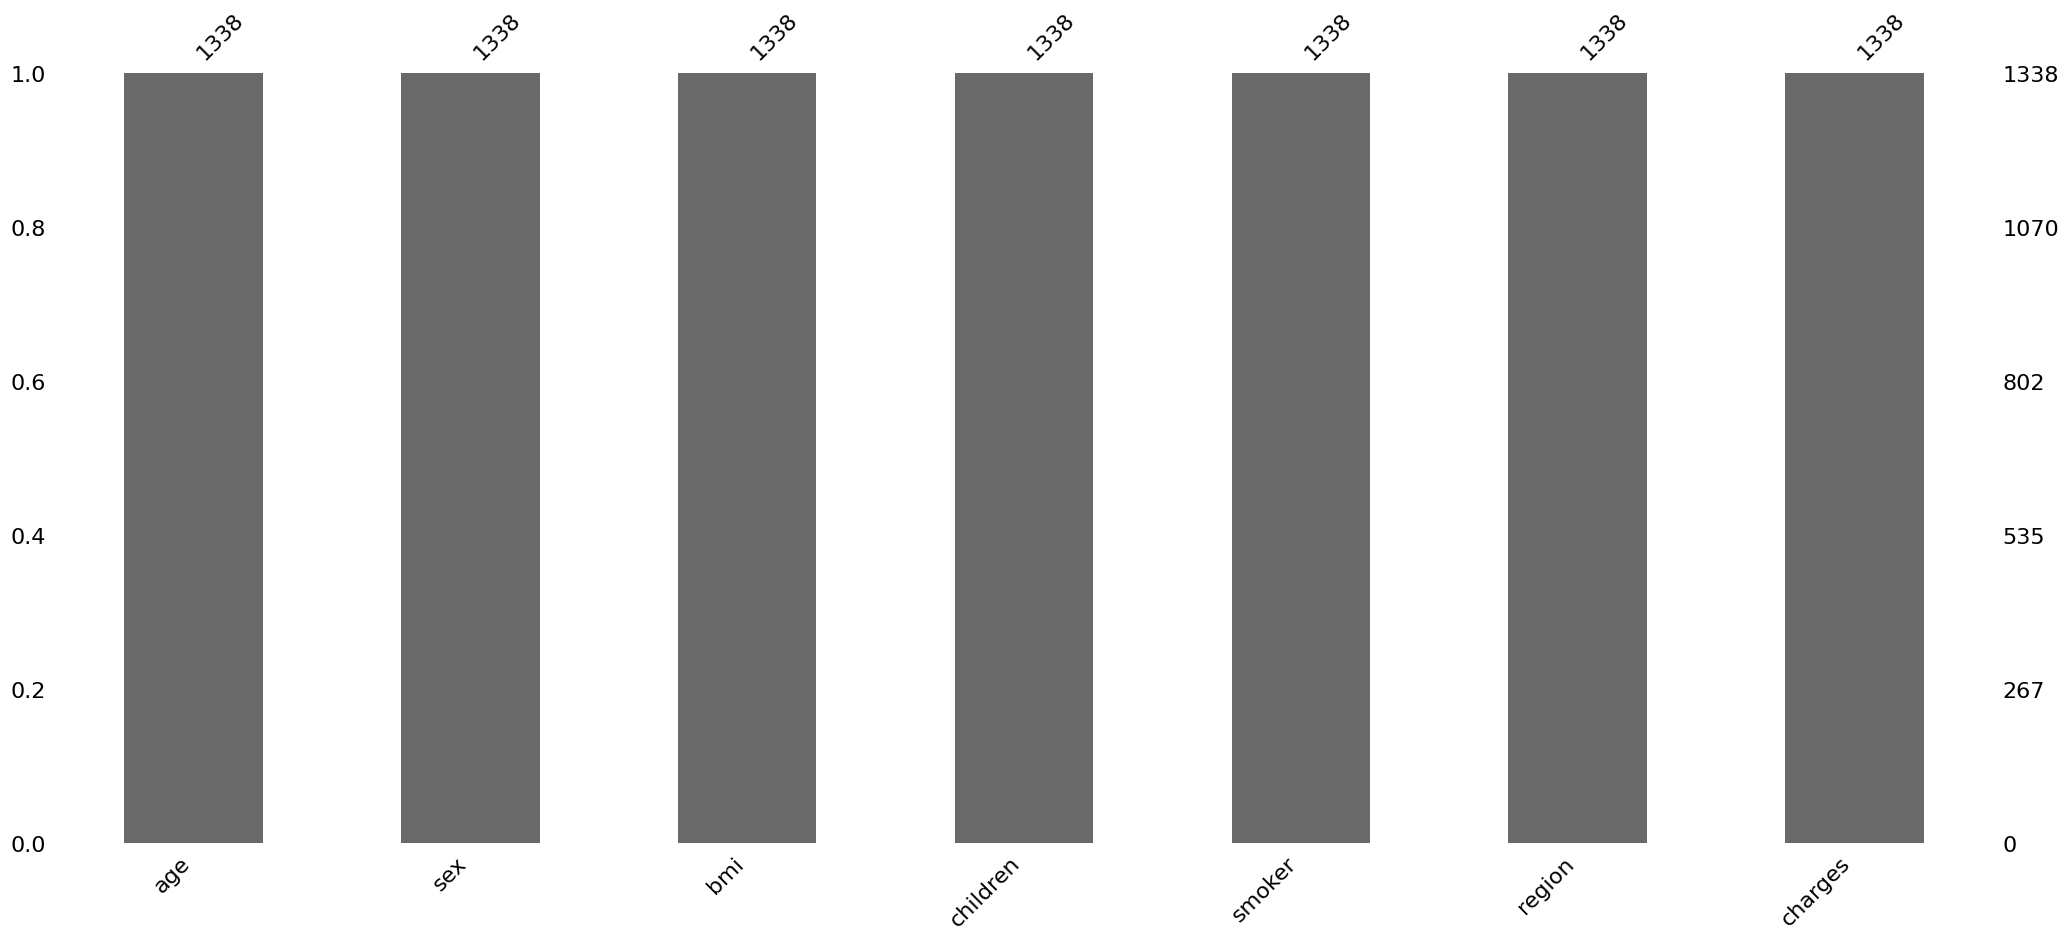

In [8]:
# check the nulls using missingno
msn.bar(df)

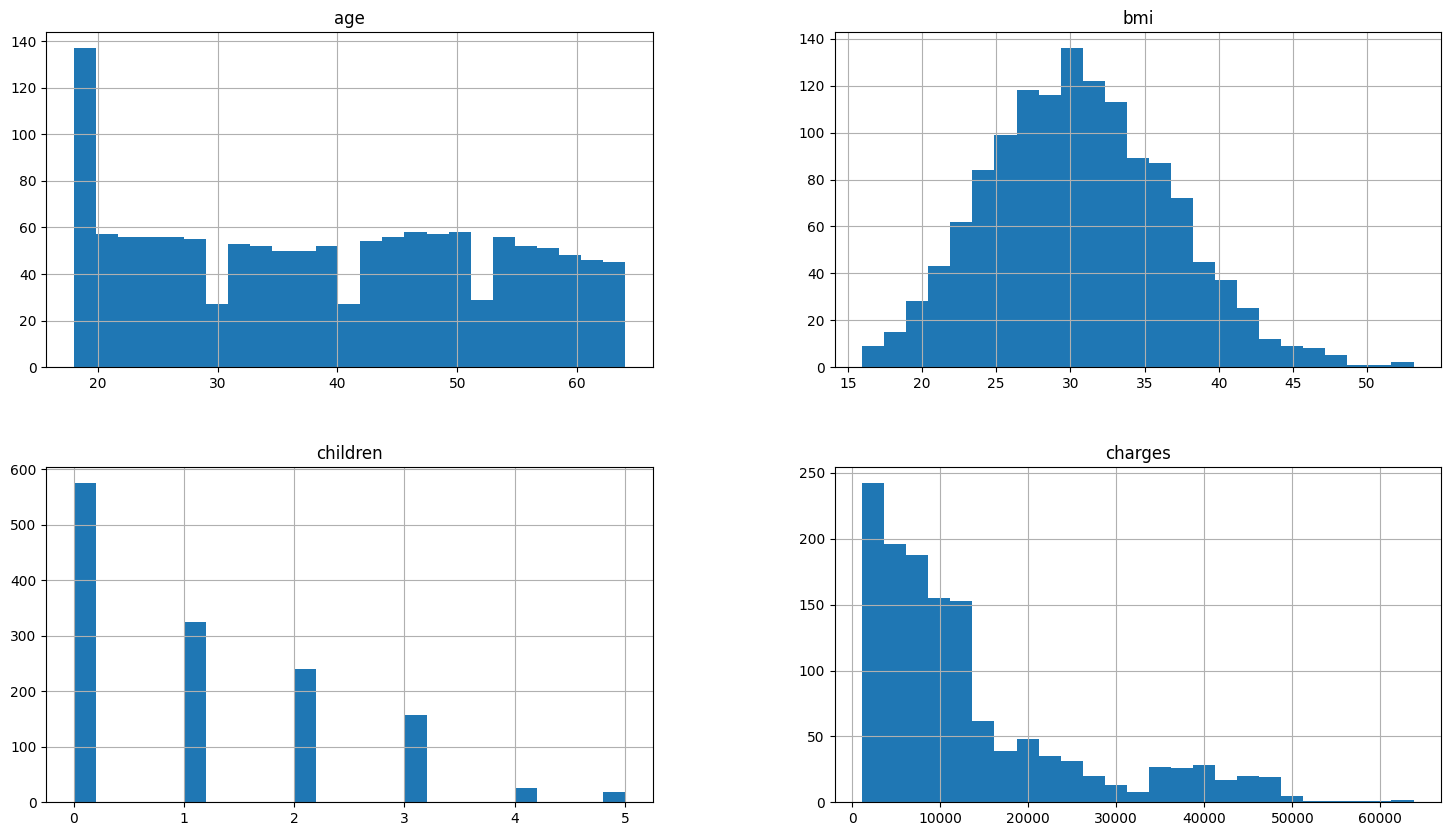

In [9]:
# histograme
df.hist(figsize=(18, 10), bins=25);

In [10]:
# Creating scatter plot 
fig = px.scatter(df, x='age', y='charges', color='smoker', title='Age vs Charges')
fig.show()

In [11]:
# Creating a histogram of charges
fig = px.histogram(df, x='charges', title='Distribution of Charges')
fig.show()

In [13]:
# Calculating average charges based on the number of children
avg_charges_children = df.groupby('children').agg({'charges': 'mean'}).reset_index()

# Assigning different colors to each bar
colors = px.colors.qualitative.Set1[:len(avg_charges_children)]

# Creating a bar chart with different colors for each bar
fig = px.bar(avg_charges_children, x='children', y='charges', 
             title='Average Charges Based on Number of Children', color='children',
             color_discrete_sequence=colors)

fig.update_xaxes(title='Number of Children')
fig.update_yaxes(title='Average Charges')
fig.show()

In [15]:
# Counting the number of individuals in each region
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Creating a pie chart with a larger size
fig = px.pie(region_counts, values='Count', names='Region', title='Distribution of Individuals by Region')
fig.update_layout(width=800, height=600)  
fig.show()

In [23]:
# Creating a box plot for charges based on gender
fig = px.box(df, x='sex', y='charges', title='Distribution of Charges by Gender')
fig.update_xaxes(title='Gender')
fig.update_yaxes(title='Charges')
fig.update_layout(width=1100, height=600)  
fig.show()

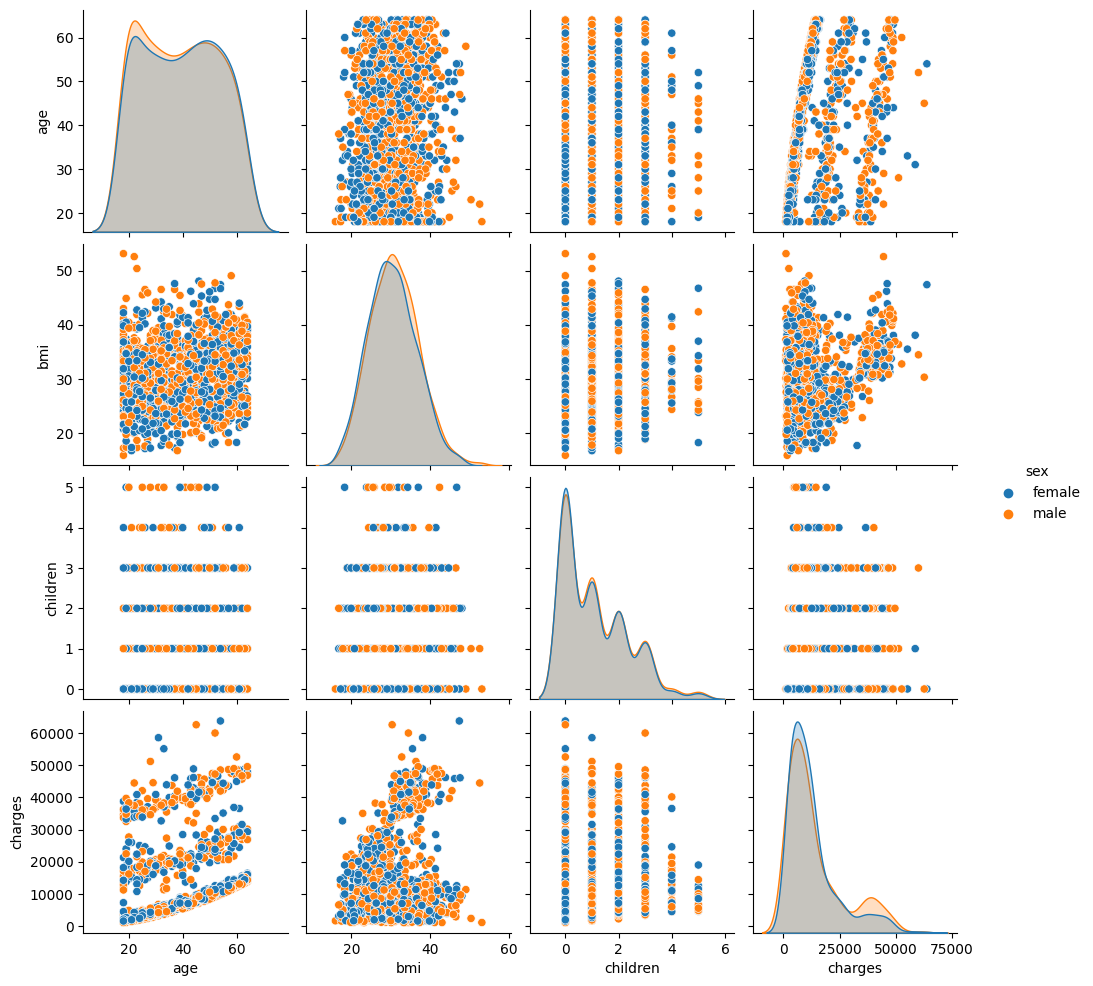

In [26]:
# pairplot
sns.pairplot(data=df, hue="sex")
plt.show()

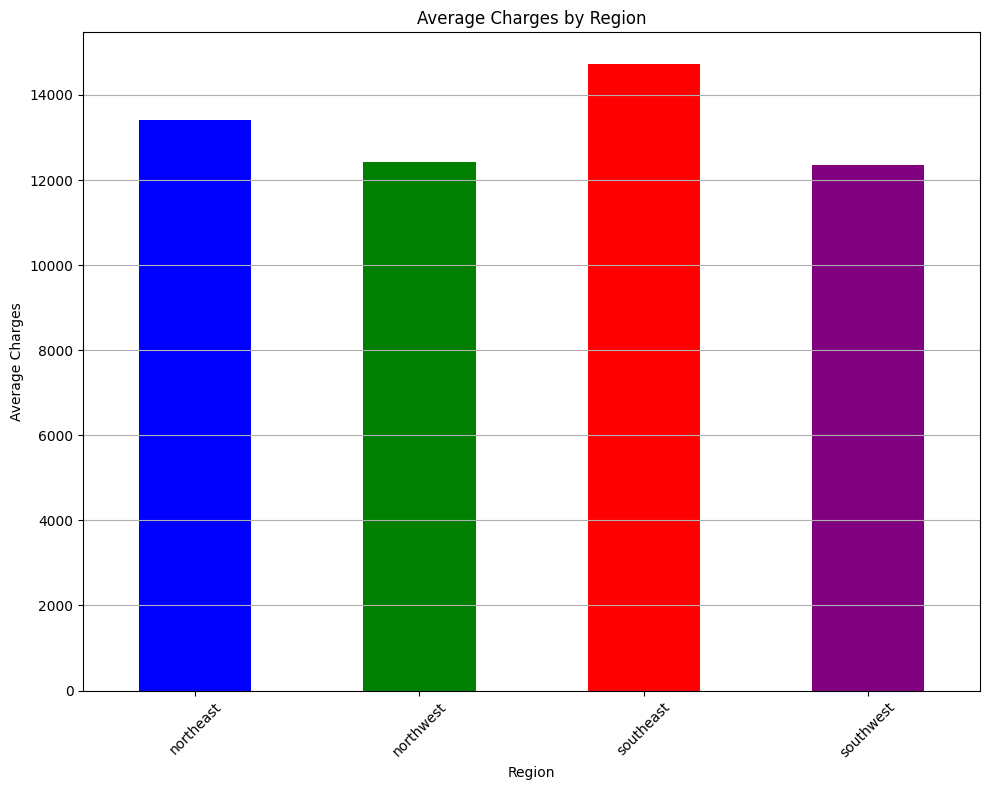

In [29]:
# Calculate average charges per region
avg_charges_per_region = df.groupby('region')['charges'].mean()

# Define colors for each region
colors = ['blue', 'green', 'red', 'purple']

# Plotting a bar chart for average charges per region using Matplotlib
plt.figure(figsize=(10, 8))
avg_charges_per_region.plot(kind='bar', color=colors)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## `Data Preprocessing`

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### creating a new feature

In [35]:
# Define categories based on BMI values
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()]
df['BMI Category'] = pd.cut(df['bmi'], bins=bins, labels=categories, right=False)

# If 'children' column value > 0, set 'Has Children' to 'Yes', otherwise 'No'
df['Has Children'] = df['children'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Combine age and smoker information to create categories
df['Age Smoker Group'] = df.apply(lambda row: 'Young Smoker' if row['age'] < 25 and row['smoker'] == 'yes'
                                  else 'Mid-Aged Smoker' if row['age'] >= 25 and row['age'] <= 40 and row['smoker'] == 'yes'
                                  else 'Non-Smoker', axis=1)

In [36]:
df

,age,sex,bmi,children,smoker,region,charges,BMI Category,Has Children,Age Smoker Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No,Young Smoker
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Yes,Non-Smoker
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Yes,Non-Smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal,No,Non-Smoker
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No,Non-Smoker
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Yes,Non-Smoker
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,No,Non-Smoker
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,No,Non-Smoker
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,No,Non-Smoker


In [45]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1338 non-null   int64   
 1   sex               1338 non-null   object  
 2   bmi               1338 non-null   float64 
 3   children          1338 non-null   int64   
 4   smoker            1338 non-null   object  
 5   region            1338 non-null   object  
 6   charges           1338 non-null   float64 
 7   BMI Category      1337 non-null   category
 8   Has Children      1338 non-null   object  
 9   Age Smoker Group  1338 non-null   object  
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 95.7+ KB


In [68]:
# categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == object or df[col].dtype == 'category']
categorical_columns

['sex', 'smoker', 'region', 'BMI Category', 'Has Children', 'Age Smoker Group']

In [69]:
# make encodeing using LabelEncoder
df_copy = df.copy()
for col in categorical_columns:
    df_copy.loc[:, col] = LabelEncoder().fit_transform(df_copy.loc[:, col])

In [70]:
df_copy

,age,sex,bmi,children,smoker,region,charges,BMI Category,Has Children,Age Smoker Group
0,19,0,27.900,0,1,3,16884.92400,2,0,2
1,18,1,33.770,1,0,2,1725.55230,1,1,1
2,28,1,33.000,3,0,2,4449.46200,1,1,1
3,33,1,22.705,0,0,1,21984.47061,0,0,1
4,32,1,28.880,0,0,1,3866.85520,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,1,1
1334,18,0,31.920,0,0,0,2205.98080,1,0,1
1335,18,0,36.850,0,0,2,1629.83350,1,0,1
1336,21,0,25.800,0,0,3,2007.94500,2,0,1


In [71]:
df

,age,sex,bmi,children,smoker,region,charges,BMI Category,Has Children,Age Smoker Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,No,Young Smoker
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Yes,Non-Smoker
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Yes,Non-Smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal,No,Non-Smoker
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,No,Non-Smoker
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Yes,Non-Smoker
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,No,Non-Smoker
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,No,Non-Smoker
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,No,Non-Smoker


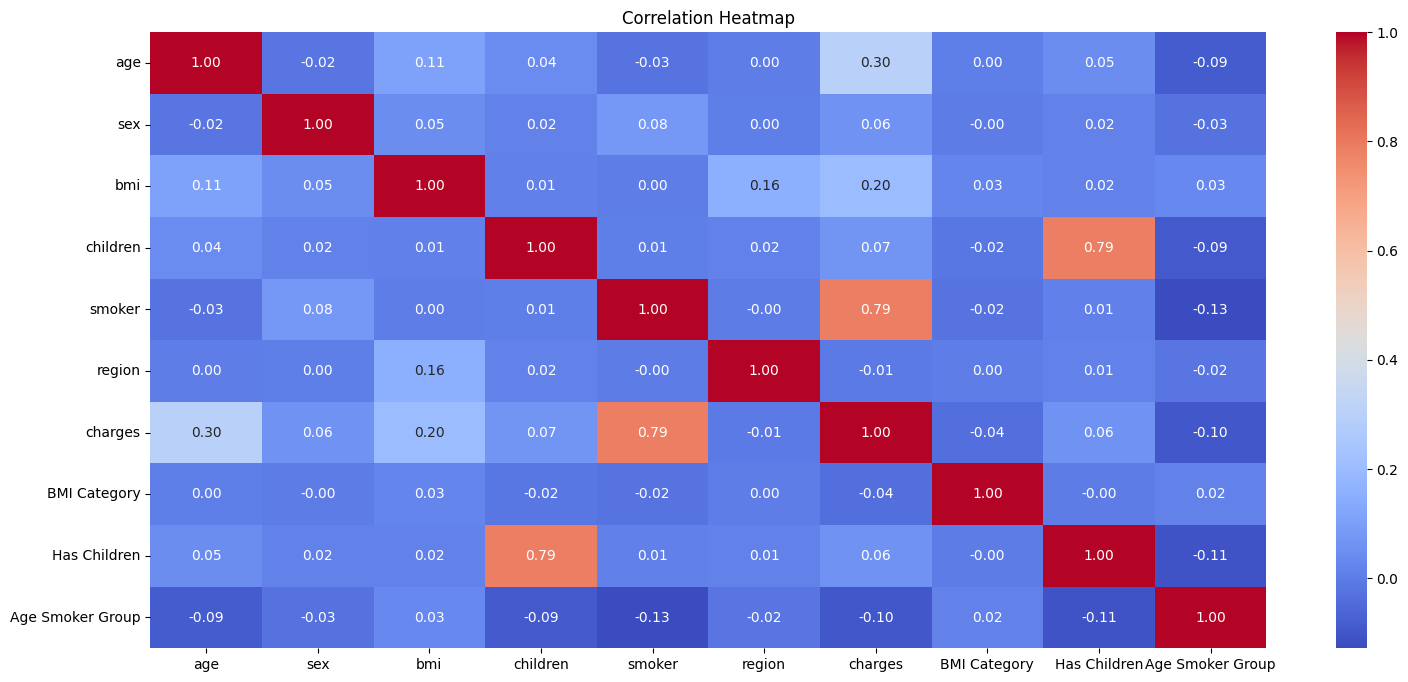

In [72]:
# Correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Split

In [73]:
X = df.drop(columns=["charges"], axis=1) # Features
y = df["charges"]  # target

In [77]:
# this func to check if there are numeric columns or categorical columns and return them
def check(X):
    
    # numeric columns
    numeric_columns = [col for col in X.columns if X[col].dtype != object and X[col].dtype != 'category']
    
    # categorical columns
    categorical_columns = [col for col in df.columns if df[col].dtype == object or df[col].dtype == 'category']
    
    if numeric_columns and categorical_columns:
        
        return numeric_columns, categorical_columns
    
    elif numeric_columns:
        
        return numeric_columns
    
        
    else:
        return categorical_columns
        
numeric_columns, categorical_columns = check(X)

In [78]:
# numeric columns
numeric_columns

['age', 'bmi', 'children']

In [79]:
# categorical columns
categorical_columns

['sex', 'smoker', 'region', 'BMI Category', 'Has Children', 'Age Smoker Group']

### Pipeline

In [80]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_columns)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_columns)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("Label", OneHotEncoder(sparse=False))
                ])

In [81]:
def Preprocessing(X):
    numeric_columns = [col for col in X.columns if X[col].dtype != object]
    categorical_columns = [col for col in X.columns if X[col].dtype == object or X[col].dtype == 'category']
    if numeric_columns and categorical_columns:
        # Total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cate_pipeline", cate_pipeline)
        ])
        # Make fitting
        X_final = total_pipeline.fit_transform(X)
        return X_final

    elif numeric_columns and not categorical_columns:
        # Make fitting
        X_final = num_pipeline.fit_transform(X)
        return X_final

    elif categorical_columns and not numeric_columns:
        # Make fitting for categorical pipeline only
        X_final = cate_pipeline.fit_transform(X[categorical_columns])
        return X_final

    else:
        return "Please provide either numeric_columns, categorical_columns, or both."

X_final = Preprocessing(X)
print(f"X_final is = {X_final}")


X_final is = [[-1.43876426 -0.45332    -0.90861367 ...  0.          0.
   1.        ]
 [-1.50996545  0.5096211  -0.07876719 ...  0.          1.
   0.        ]
 [-0.79795355  0.38330685  1.58092576 ...  0.          1.
   0.        ]
 ...
 [-1.50996545  1.0148781  -0.90861367 ...  0.          1.
   0.        ]
 [-1.29636188 -0.79781341 -0.90861367 ...  0.          1.
   0.        ]
 [ 1.55168573 -0.26138796 -0.90861367 ...  0.          1.
   0.        ]]


### Splitting The Data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.30, random_state=42, shuffle=True)

In [83]:
# show the shapes
print(f"the X_train shape is {X_train.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_test shape is {y_test.shape}")

the X_train shape is (936, 21)
the y_train shape is (936,)
the X_test shape is (402, 21)
the y_test shape is (402,)


## `The Model & Hyperparameters Tunning`

### AdaBoostRegressor

In [84]:
AdaBoost = AdaBoostRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "learning_rate":np.arange(0.1, 1, 0.2),
    "loss":['linear', 'square', 'exponential']
}

Grid_search = GridSearchCV(AdaBoost, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [85]:
# show the best parameters
Grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}

In [86]:
# make the model 
AdaBoost_model = Grid_search.best_estimator_

In [87]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoost_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoost_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [4949.3916462  4740.35139886 5171.59119973 5193.52909116 5328.29583482]
the mean to the errors is ==> 5080.870900020042
****************************************************************************************************
the RMSE is 5065.396019981306


In [88]:
# show the feature importance 
importance = AdaBoost_model.feature_importances_
importance

array([1.36327095e-01, 1.77924987e-01, 8.46000269e-03, 2.87912734e-04,
       3.71063641e-04, 4.65027946e-01, 1.93757985e-01, 3.29617633e-04,
       0.00000000e+00, 0.00000000e+00, 3.13097946e-04, 0.00000000e+00,
       7.77146016e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.25285954e-03, 3.73643159e-03, 1.88785881e-04, 2.25075532e-03,
       0.00000000e+00])

In [89]:
# prediction
y_pred_ِAda = AdaBoost_model.predict(X_train)

In [90]:
pd.DataFrame(np.c_[y_pred_ِAda, y_train], columns=["prediction", "Actual"])

,prediction,Actual
0,16063.464264,13429.03540
1,12769.527241,24603.04837
2,15212.527383,27322.73386
3,45843.567245,42303.69215
4,36687.646312,42112.23560
...,...,...
931,6822.461108,4561.18850
932,9137.507049,8582.30230
933,14194.790638,11931.12525
934,45421.980357,46113.51100


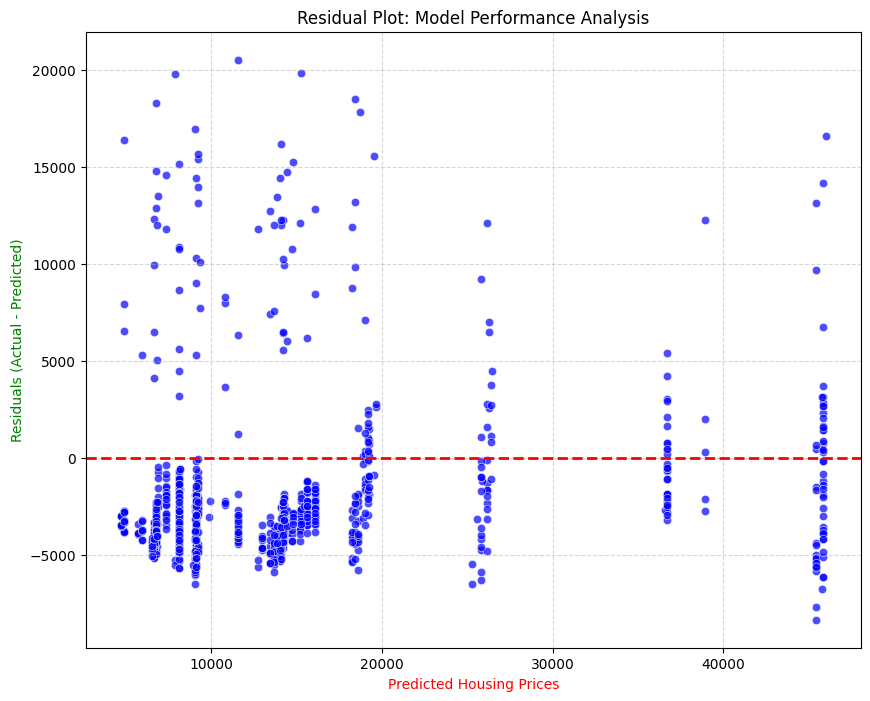

In [92]:
# Calculate residuals
residuals = y_train - y_pred_ِAda

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِAda, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِAda), max(y_pred_ِAda)], 5, -5, color='red', alpha=0.1)

plt.show()

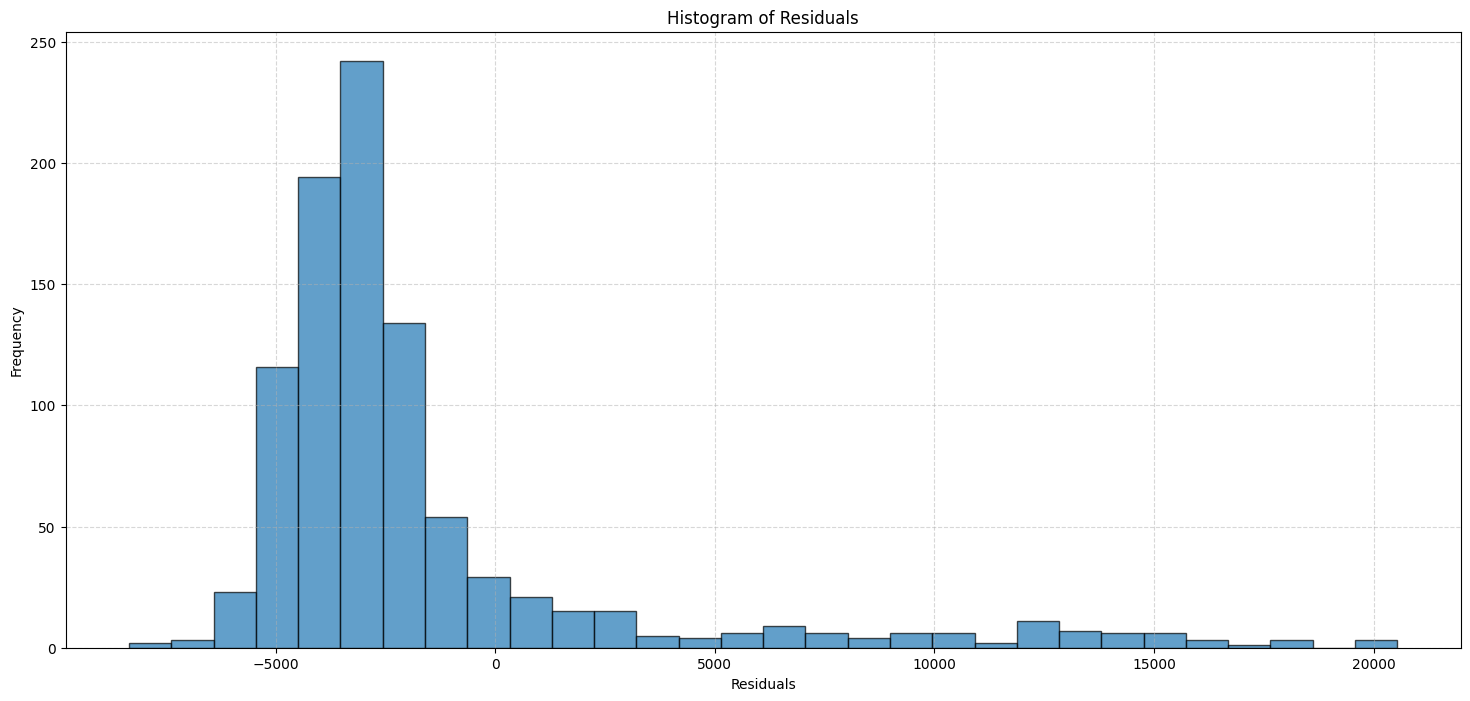

In [131]:
# Calculate residuals
residuals = y_train - y_pred_ِAda 

# Plot histogram of residuals
plt.figure(figsize=(18, 8))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### RandomForestRegressor

In [93]:
Random_forest = RandomForestRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "max_depth":np.arange(2, 10, 2),
}

Grid_search = GridSearchCV(Random_forest, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [94]:
# show the best parameters
Grid_search.best_params_

{'max_depth': 4, 'n_estimators': 80}

In [95]:
# make the model 
Randomforest_model = Grid_search.best_estimator_

In [96]:
# make croos validation
croos_val = cross_val_score(estimator=Randomforest_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Randomforest_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [4477.9450274  4197.67653602 4965.96771137 4826.514851   4951.80418071]
the mean to the errors is ==> 4693.589788868374
****************************************************************************************************
the RMSE is 4725.853062531499


In [97]:
# show the feature importance 
importance = Randomforest_model.feature_importances_
importance

array([1.18924234e-01, 1.61346810e-01, 5.29513535e-03, 8.84133352e-05,
       1.92849356e-04, 4.86718831e-01, 2.08815420e-01, 1.20239592e-03,
       1.13615117e-04, 8.11699292e-05, 5.55943351e-05, 1.41669508e-04,
       1.02034574e-02, 4.17424770e-04, 0.00000000e+00, 0.00000000e+00,
       2.75490738e-03, 9.21128163e-04, 0.00000000e+00, 2.72694405e-03,
       0.00000000e+00])

In [98]:
# prediction
y_pred_ِRand = Randomforest_model.predict(X_train)

In [99]:
pd.DataFrame(np.c_[y_pred_ِRand, y_train], columns=["prediction", "Actual"])

,prediction,Actual
0,14331.311202,13429.03540
1,10558.473168,24603.04837
2,13446.359350,27322.73386
3,45025.439283,42303.69215
4,39115.245100,42112.23560
...,...,...
931,6352.644918,4561.18850
932,7493.392428,8582.30230
933,12995.885638,11931.12525
934,43568.543694,46113.51100


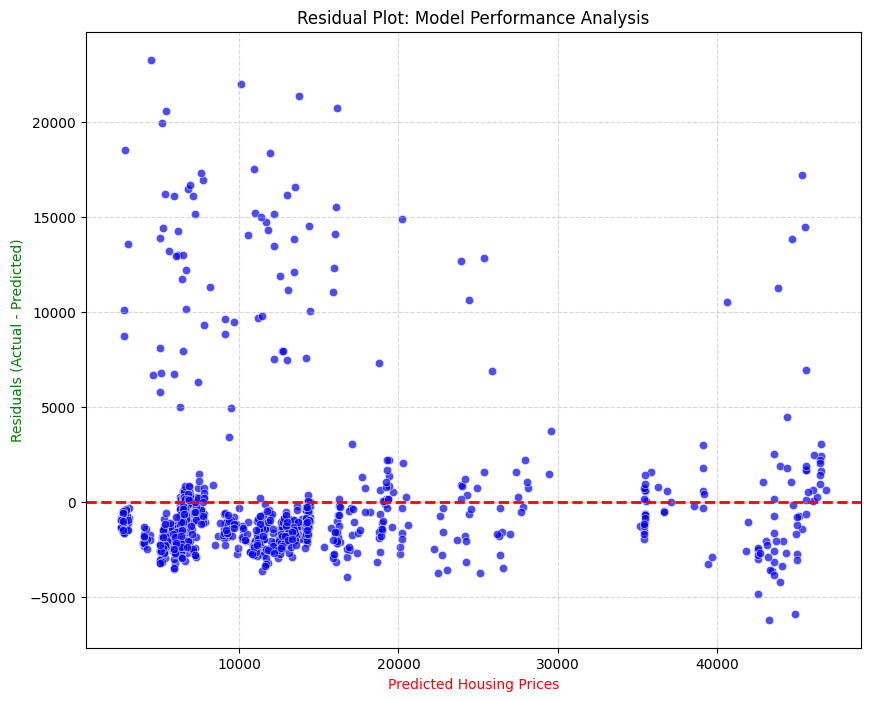

In [100]:
# Calculate residuals
residuals = y_train - y_pred_ِRand

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِRand, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِRand), max(y_pred_ِRand)], 5, -5, color='red', alpha=0.1)

plt.show()

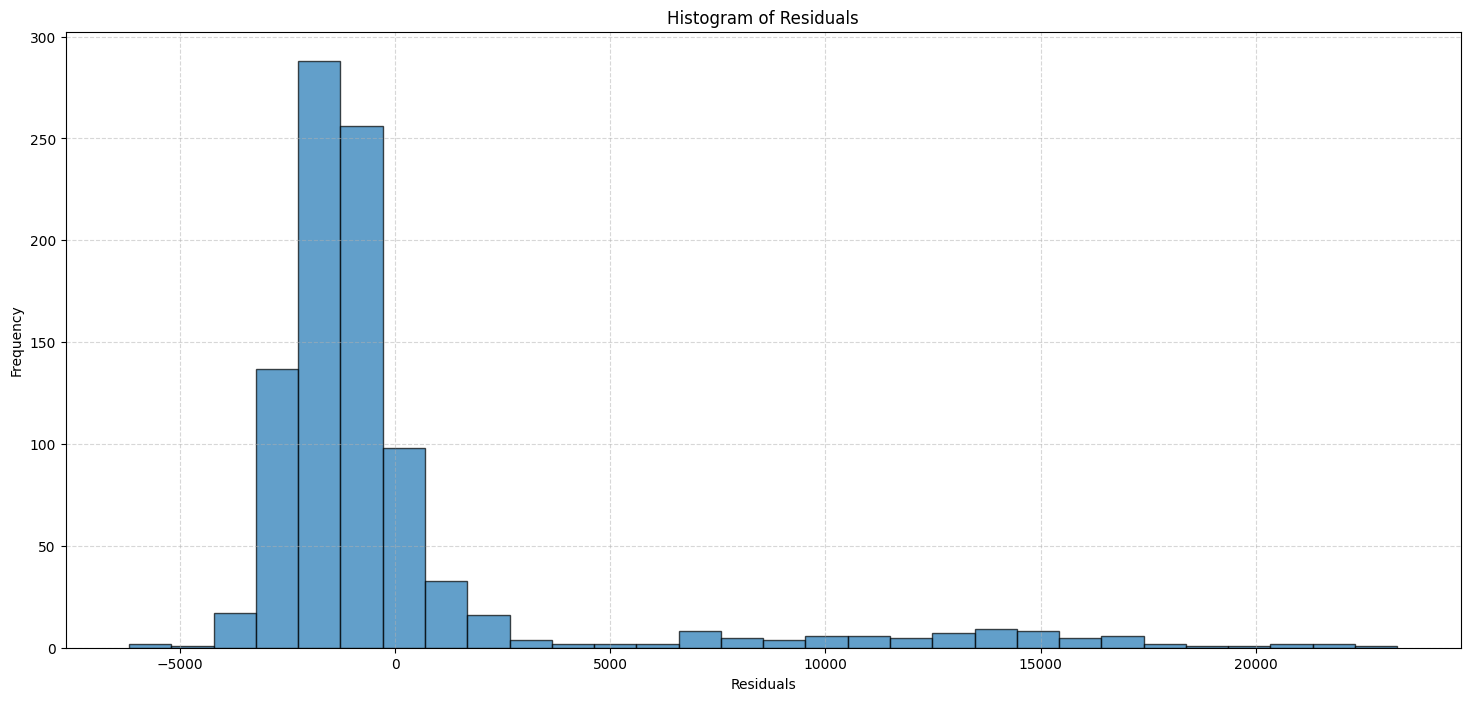

In [130]:
# Calculate residuals
residuals = y_train - y_pred_ِRand 

# Plot histogram of residuals
plt.figure(figsize=(18, 8))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### XGBoost

In [101]:
Xgb_reg= xgb.XGBRegressor()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Grid_search = RandomizedSearchCV(estimator=Xgb_reg, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="neg_mean_squared_error", n_iter=500)


# fitting
Grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='neg_mean_squared_error')

In [102]:
# show the best params
Grid_search.best_params_

{'subsample': 0.95,
 'n_estimators': 60,
 'max_depth': 2,
 'learning_rate': 0.2,
 'alpha': 0.4}

In [103]:
# the final model
Xgb_reg_final = Grid_search.best_estimator_

In [104]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_reg_final, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_reg_final , X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [4421.15935222 4238.1676609  4934.39075045 4993.84752326 4828.92335826]
the mean to the errors is ==> 4692.844363564951
****************************************************************************************************
the RMSE is 4692.562495465067


In [105]:
# show the feature importance 
importance = Xgb_reg_final.feature_importances_
importance

array([0.08787031, 0.10375147, 0.01357181, 0.00524375, 0.        ,
       0.7452122 , 0.        , 0.00490673, 0.00186276, 0.        ,
       0.00659431, 0.        , 0.        , 0.00749076, 0.        ,
       0.        , 0.        , 0.        , 0.01641667, 0.00476568,
       0.00231344], dtype=float32)

In [106]:
# prediction
y_pred_ِxgb = Xgb_reg_final.predict(X_train)

In [107]:
pd.DataFrame(np.c_[y_pred_ِxgb, y_train], columns=["prediction", "Actual"])

,prediction,Actual
0,14367.247070,13429.03540
1,8760.314453,24603.04837
2,13842.785156,27322.73386
3,43056.726562,42303.69215
4,40941.207031,42112.23560
...,...,...
931,7632.961914,4561.18850
932,8350.125000,8582.30230
933,12257.958008,11931.12525
934,41505.402344,46113.51100


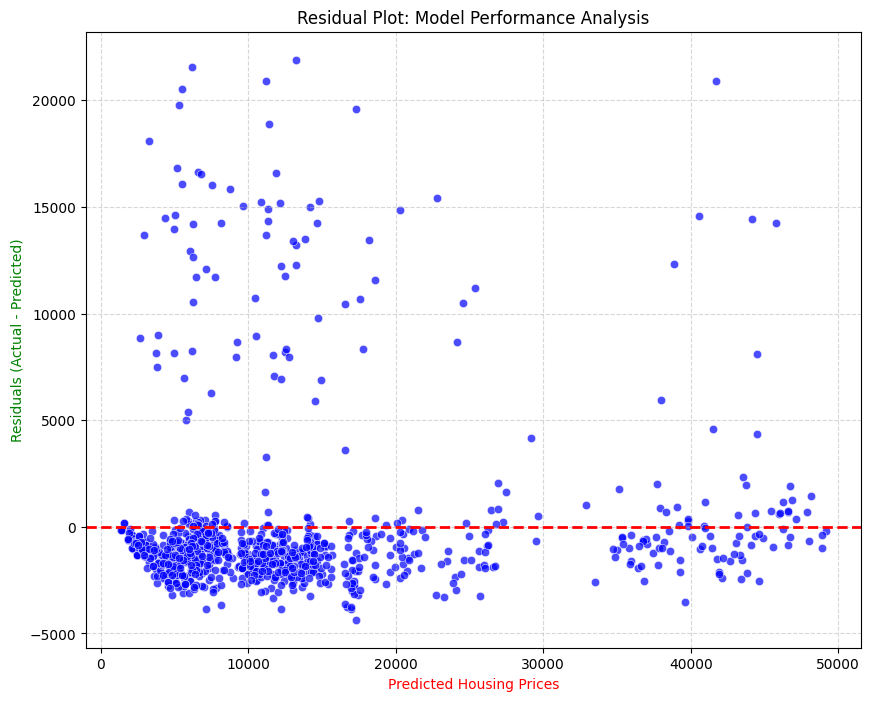

In [108]:
# Calculate residuals
residuals = y_train - y_pred_ِxgb

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِxgb, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِxgb), max(y_pred_ِxgb)], 5, -5, color='red', alpha=0.1)

plt.show()

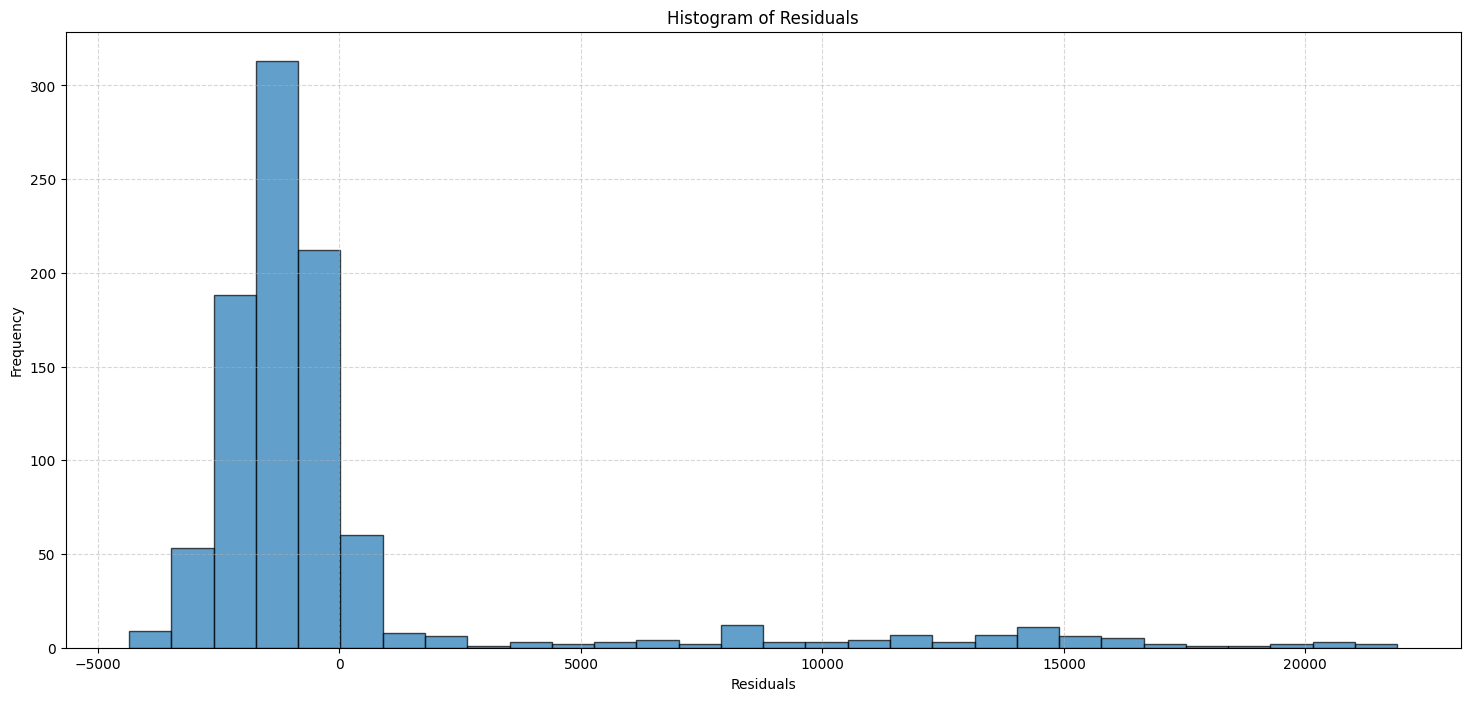

In [129]:
# Calculate residuals
residuals = y_train - y_pred_ِxgb 

# Plot histogram of residuals
plt.figure(figsize=(18, 8))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Comparison Between Models

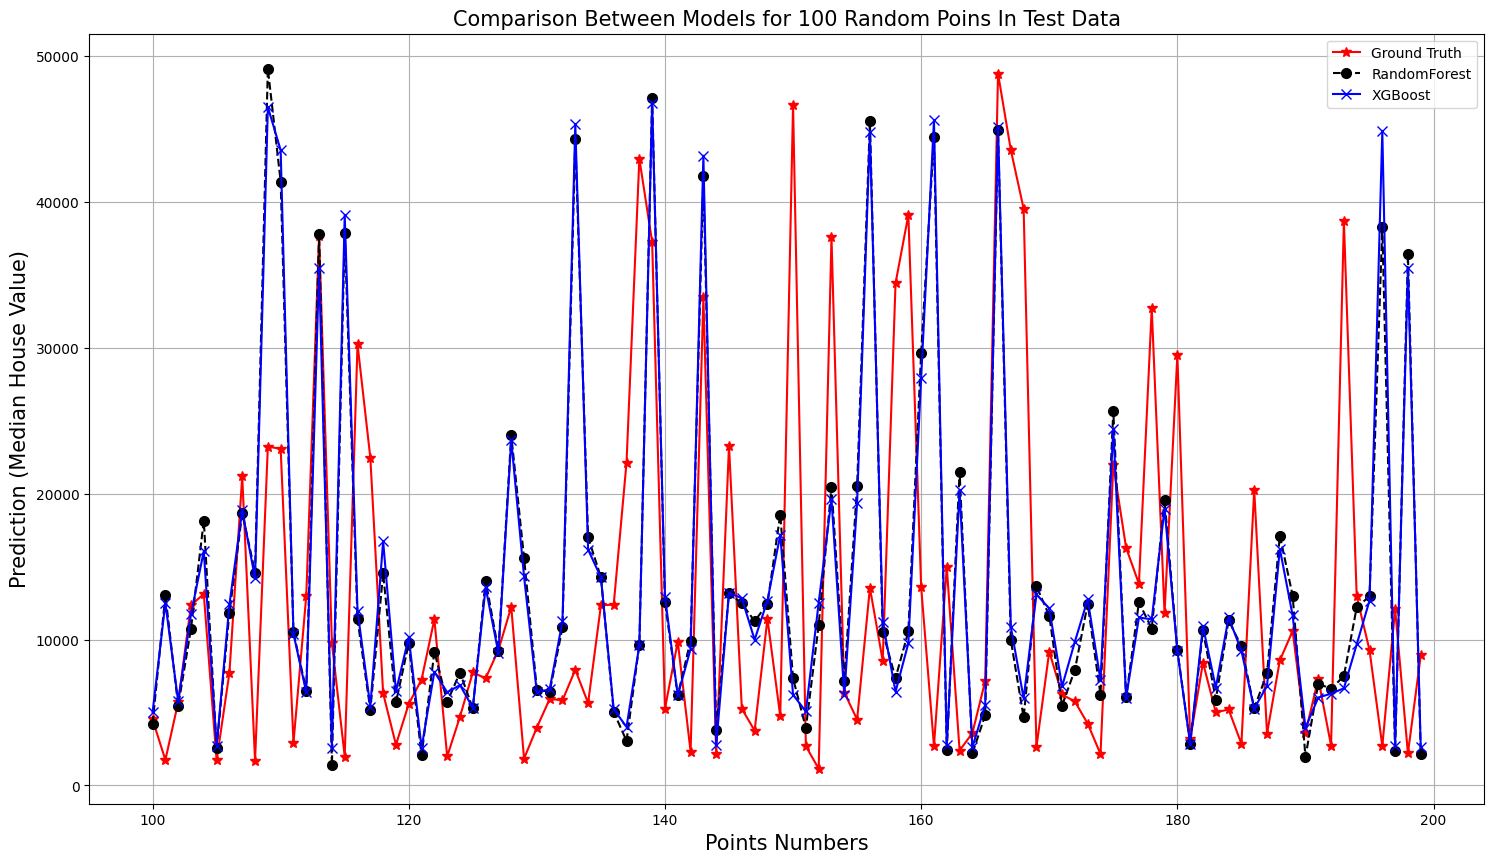

In [109]:
# X_axis numbers
x_x = np.arange(100, 200)

#plotting
plt.figure(figsize=(18, 10))
plt.plot(x_x, y_test.values[100:200], 'r*-', markersize=7, label="Ground Truth")
plt.plot(x_x, y_pred_ِxgb[100:200], 'ko--', markersize=7, label="RandomForest")
plt.plot(x_x, y_pred_ِRand[100:200], 'bx-', markersize=7, label="XGBoost")
plt.title("Comparison Between Models for 100 Random Poins In Test Data", fontsize=15, color="k")
plt.xlabel("Points Numbers", fontsize=15, color="k")
plt.ylabel("Prediction (Median House Value)", fontsize=15, color="k")
plt.legend()
plt.grid(True)
plt.show()


### Deep Learning model

In [110]:
# Creating the neural network model with dropout and early stopping
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1)) 

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Adding early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/20
30/30 [==============================] - 1s 10ms/step - loss: 325414400.0000 - mse: 325414400.0000 - val_loss: 315879648.0000 - val_mse: 315879648.0000
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 324769312.0000 - mse: 324769312.0000 - val_loss: 314243296.0000 - val_mse: 314243296.0000
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 320495840.0000 - mse: 320495840.0000 - val_loss: 305655552.0000 - val_mse: 305655552.0000
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 304518336.0000 - mse: 304518336.0000 - val_loss: 278791104.0000 - val_mse: 278791104.0000
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 262782656.0000 - mse: 262782656.0000 - val_loss: 223149808.0000 - val_mse: 223149808.0000
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 198681648.0000 - mse: 198681648.0000 - val_loss: 159123504.0000 - val_mse: 159123504.0000
Epoch 7/20
30/30 [=========

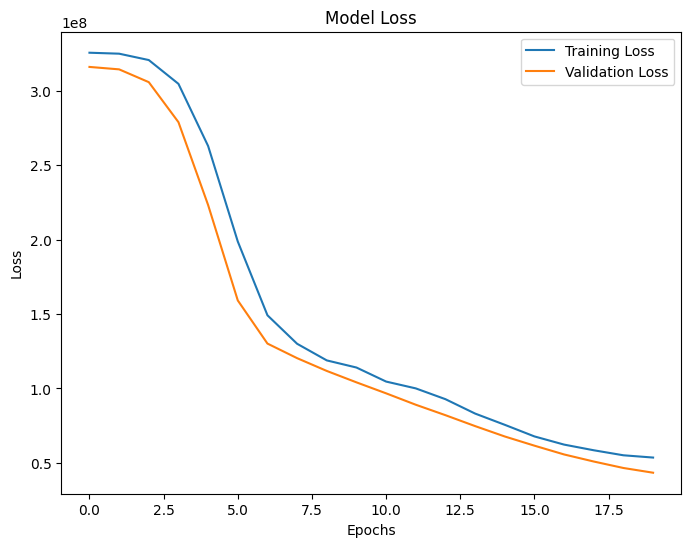

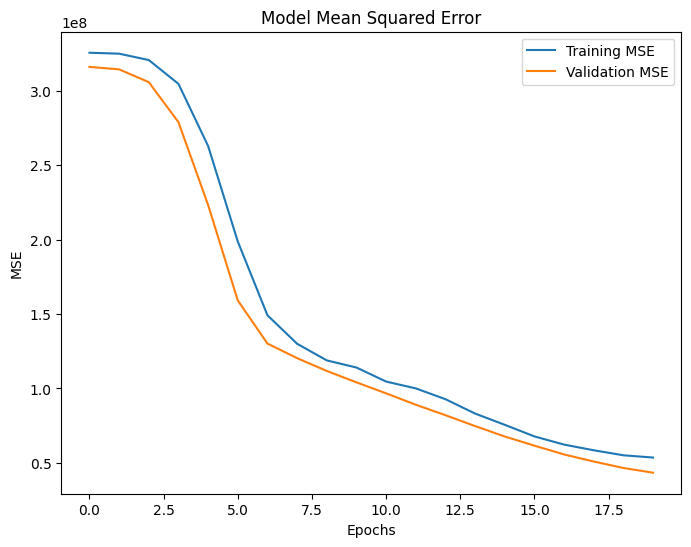

In [111]:
# Visualization: Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [113]:
# Evaluating the model
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"RMSE on Test Data: {np.sqrt(rmse)}")


RMSE on Test Data: 6592.2587934637395


In [119]:
# prediction by deep learning model on train
y_pred_deep_test = model.predict(X_test)
y_pred_deep_test[:20]

13/13 [==============================] - 0s 1ms/step


array([[ 9234.438 ],
       [ 8200.191 ],
       [27527.924 ],
       [10259.338 ],
       [25615.164 ],
       [12317.061 ],
       [ 1735.2133],
       [20507.041 ],
       [ 2181.471 ],
       [12063.018 ],
       [25986.549 ],
       [11825.144 ],
       [ 4555.708 ],
       [31809.428 ],
       [34184.45  ],
       [30441.043 ],
       [17826.684 ],
       [28346.42  ],
       [ 9326.261 ],
       [20684.697 ]], dtype=float32)

In [115]:
pd.DataFrame(np.c_[y_pred_deep_test, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,9234.438477,9095.06825
1,8200.191406,5272.17580
2,27527.923828,29330.98315
3,10259.337891,9301.89355
4,25615.164062,33750.29180
...,...,...
397,18104.074219,9541.69555
398,6903.000488,4399.73100
399,2158.517334,2200.83085
400,18304.625000,11363.28320


### we founded that XGBoost is the best so we will use it to predict on X_test

In [116]:
# prediction
y_pred_XGB = Xgb_reg_final.predict(X_test)

In [117]:
# RMSE
print("The RMSE:")
np.sqrt(mean_squared_error(y_test, y_pred_XGB))

The RMSE:


4318.463388314282

In [118]:
pd.DataFrame(np.c_[y_pred_XGB, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,11002.309570,9095.06825
1,6155.765625,5272.17580
2,28678.431641,29330.98315
3,9931.660156,9301.89355
4,34612.691406,33750.29180
...,...,...
397,11584.037109,9541.69555
398,6410.371094,4399.73100
399,2917.470215,2200.83085
400,13245.143555,11363.28320


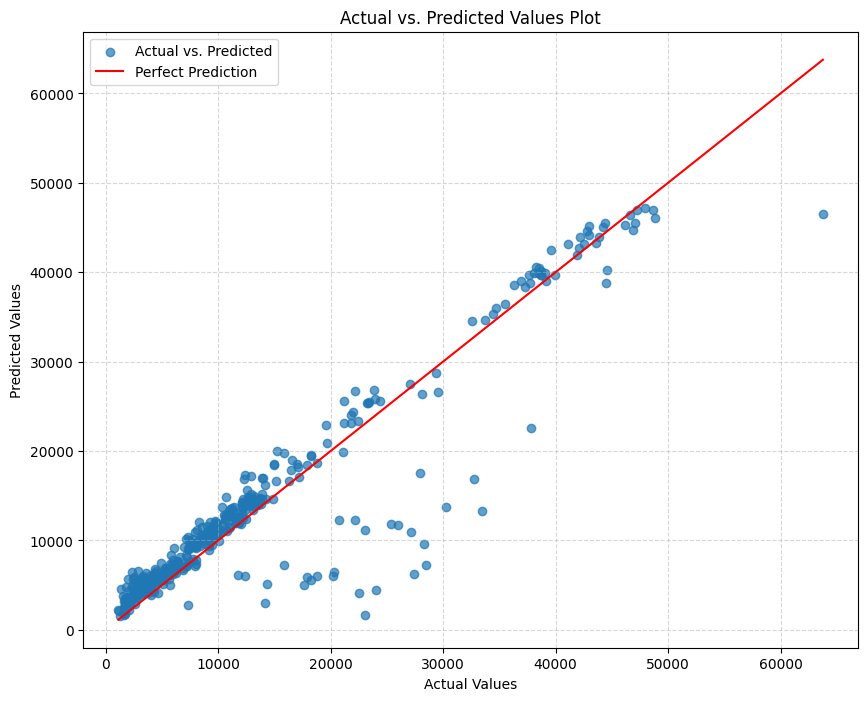

In [134]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_XGB, alpha=0.7, label='Actual vs. Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test, 1))(np.unique(y_test)), color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## `By: Mohammed Hamza`